In [1]:
import findspark
findspark.init()

import pyspark
import random

sc = pyspark.SparkContext(appName="Driver")

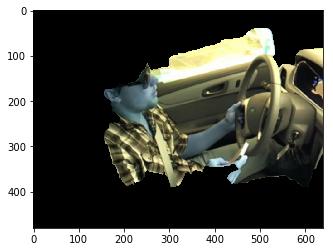

(<matplotlib.image.AxesImage at 0x1f9386e6400>, None)

In [7]:
# img=cv2.imread("C:/Users/saika/Desktop/images/img_6.jpg")
k=img
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (100,40,550,350)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.show()

True

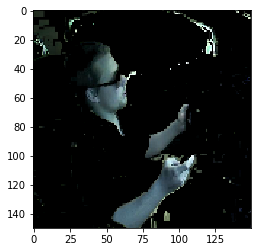

In [8]:
img=cv2.imread("C:/Users/saika/Desktop/images/img_6.jpg")
k=img
# Constants for finding range of skin color in YCrCb
min_YCrCb = np.array([0,113,80],np.uint8)
max_YCrCb = np.array([255,153,125],np.uint8)
imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

# Find region with skin tone in YCrCb image

skinRegion = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
img = cv2.bitwise_and(img,img,mask=skinRegion)
img = cv2.resize(img,(150,150))
plt.imshow(img)
cv2.imwrite("C:/Users/saika/Desktop/img_6.jpg",img)



In [29]:
import os
import time
start_time = time.time()
print(start_time)
data_dir='C:/Users/saika/Desktop/classes'
target_dir="C:/Users/saika/Desktop/target"
i=0
for categ in os.listdir(data_dir):
    path = os.path.join(data_dir,categ)
    i=i+1
    for image in (os.listdir(path)):
        path2 = os.path.join(path,image)
        if (os.path.exists(path2)):
            img=cv2.imread(path2)
            # Constants for finding range of skin color in YCrCb
            min_YCrCb = np.array([0,113,80],np.uint8)
            max_YCrCb = np.array([255,153,125],np.uint8)
            imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

            # Find region with skin tone in YCrCb image

            skinRegion = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
            img = cv2.bitwise_and(img,img,mask=skinRegion)
            img = cv2.resize(img,(150,150))
            img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            target_path = os.path.join(target_dir,categ)
            if not os.path.exists(target_path):
                os.makedirs(target_path)
            target_image_path = os.path.join(target_path,image)
            cv2.imwrite(target_image_path,img) 
    print(categ+":"+str(time.time()-start_time))
print(time.time()-start_time)

1512016979.186994
c0:99.33049249649048
c1:147.1544234752655
c2:206.055433511734
c3:255.53183579444885
c4:302.1531915664673
c5:348.7524800300598
c6:407.23819065093994
c7:478.03483152389526
c8:531.4891321659088
c9:594.805032491684
594.805534362793


In [8]:
def color(image,bins=(8,8,8)):
    hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv],[0,1,2],None,bins,[0,180,0,256,0,256])
    cv2.normalize(hist,hist)
    return(list(hist.flatten()))

In [14]:
import time
start_time = time.time()
print(start_time)
data_dir='C:/Users/saika/Desktop/input'
i=0
dataFrames = []
for categ in os.listdir(data_dir):
    labels = [];
    train=[]
    path = os.path.join(data_dir,categ)
    i=i+1
    for image in (os.listdir(path)):
        path2 = os.path.join(path,image)
        if (os.path.exists(path2)):
            
            img=cv2.imread(path2)
            min_YCrCb = np.array([0,113,80],np.uint8)
            max_YCrCb = np.array([255,153,125],np.uint8)
            imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

            # Find region with skin tone in YCrCb image

            skinRegion = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
            img = cv2.bitwise_and(img,img,mask=skinRegion)
            
            img_color = color(img)
            img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            img = cv2.resize(img,(50,50))
            img = img.reshape(50*50)
            img = list(img)+img_color
            train.append(img)
            labels.append(categ)
    target_path = os.path.join("C:/Users/saika/Desktop/files",categ+".csv")
    dataFrame = pd.DataFrame(train)
    dataFrame['labels']=labels
    dataFrame.to_csv(target_path, sep=',')
    print(categ+":"+str(time.time()-start_time))
    
print(time.time()-start_time)
# final = pd.concat(dataFrames)
# final['Label']=labels
# final.to_csv("C:/Users/saika/Desktop/files/final.csv", sep=',')

1512082816.4557867
c0:28.531222343444824
c1:54.277735471725464
c2:82.17335796356201
c3:122.86785364151001
c4:154.7577724456787
c5:180.77172565460205
c6:206.85996770858765
c7:229.40378761291504
c8:250.95488572120667
c9:275.2343430519104
275.2343430519104


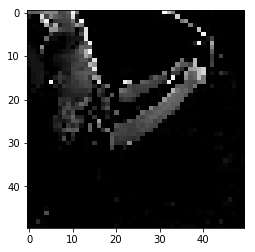

In [6]:
img=cv2.imread("C:/Users/saika/Desktop/images/c0/img_34.jpg")
img = cv2.resize(img,(50,50))
plt.imshow(img)

In [57]:
final

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,Label
0,11,0,36,0,2,28,40,8,7,0,...,0,0,0,0,0,0,0,0,0,c0
1,0,1,1,2,0,2,0,0,1,0,...,0,0,0,0,0,5,0,0,1,c0
2,0,0,0,0,0,0,0,0,2,0,...,0,0,2,0,0,0,0,0,0,c0
3,37,34,33,33,33,32,31,31,33,33,...,1,4,1,0,0,0,0,0,0,c0
4,0,2,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,c0


In [3]:
def preprocess(img):
    y=np.fromstring(img, np.uint8)
    img=cv2.imdecode(y,1);
    # Constants for finding range of skin color in YCrCb
    min_YCrCb = np.array([0,113,80],np.uint8)
    max_YCrCb = np.array([255,153,125],np.uint8)
    imageYCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

    # Find region with skin tone in YCrCb image

    skinRegion = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)
    img = cv2.bitwise_and(img,img,mask=skinRegion)
    img = cv2.resize(img,(150,150))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img = img.reshape(150*150)
    img = list(img)
    return(img)

In [4]:
import os
import time
start_time = time.time()
print(start_time)
data_dir='C:/Users/saika/Desktop/abc/'
train = []
category_list = os.listdir(data_dir);
for categ in os.listdir(data_dir):
    path = os.path.join(data_dir,categ)
    imagesRDD = sc.binaryFiles(path);
    imageRDD = imagesRDD.map(lambda x:x[1])
    img = imageRDD.map(preprocess)
    x = img.collect()
    dataFrame = pd.DataFrame(x).rename(lambda x: categ)
    train.append(dataFrame)
    print(categ+":"+str(time.time()-start_time))
print(time.time()-start_time)
result = pd.concat(train)
result.to_csv("C:/Users/saika/Desktop/final_spark.csv", sep=',')

1512074192.6852055
c0:8.055711030960083
c1:11.686021089553833
11.686486005783081


In [9]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [11]:
#x = sc.textFile("C:/Users/saika/Desktop/files/TestFiles/c0.csv")
sqlContext = SQLContext(sc)
df = sqlContext.read.format('csv').options(header='true').load("C:/Users/saika/Desktop/files/TestFiles/c0.csv")

In [12]:
df.count()

31